In [2]:
%matplotlib inline
from pylab import *
import cv2
from glob import glob
from image_defs import *
import os

Go back to 2024-11-21 Make Training Squares for every step here.

In [3]:
training_boards_folder='images/2024-11-21 - training board images'

In [4]:
board_filenames=sorted(glob(training_boards_folder+"/*.jpg"))
print(len(board_filenames))

10


## Look at all the boards

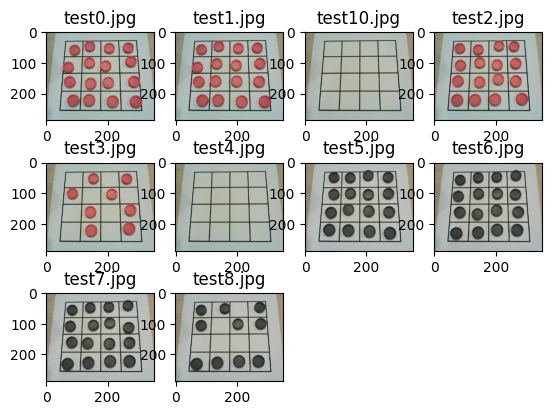

In [5]:
count=1
for filename in board_filenames:
    subplot(3,4,count)
    image=imread(filename)
    imshow(image)

    image=image[30:260,20:340]  # truncate if you need to
    
    base,name=os.path.split(filename)
    title(name)
    count+=1

In [13]:
board_states={
    'test10.jpg': '0000/0000/0000/0000',
     'test6.jpg': '1111/1111/1111/1111',
     'test7.jpg': '1111/1111/1111/1111',
     'test5.jpg': '1111/1111/1111/1111',
     'test4.jpg': '0000/0000/0000/0000',
     'test0.jpg': '2222/2222/2222/2222',
     'test1.jpg': '2222/2222/2222/2222',
     'test3.jpg': '0202/2020/0202/0202',
     'test2.jpg': '2222/2222/2222/2222',
     'test8.jpg': '1101/1011/0000/1111'
}

In [15]:
from Game import *

Version:  0.3.09


images/2024-11-21 - training board images/test10.jpg 0000/0000/0000/0000
Making folder images/2024-11-21 - training squares
Making folder images/2024-11-21 - training squares/piece_0
images/2024-11-21 - training squares/piece_0/square0_0.jpg
images/2024-11-21 - training squares/piece_0/square1_0.jpg
images/2024-11-21 - training squares/piece_0/square2_0.jpg
images/2024-11-21 - training squares/piece_0/square3_0.jpg
images/2024-11-21 - training squares/piece_0/square4_0.jpg
images/2024-11-21 - training squares/piece_0/square5_0.jpg
images/2024-11-21 - training squares/piece_0/square6_0.jpg
images/2024-11-21 - training squares/piece_0/square7_0.jpg
images/2024-11-21 - training squares/piece_0/square8_0.jpg
images/2024-11-21 - training squares/piece_0/square9_0.jpg
images/2024-11-21 - training squares/piece_0/square10_0.jpg
images/2024-11-21 - training squares/piece_0/square11_0.jpg
images/2024-11-21 - training squares/piece_0/square12_0.jpg
images/2024-11-21 - training squares/piece_0/sq

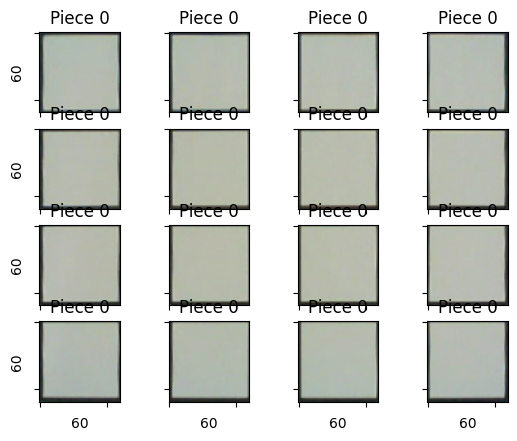

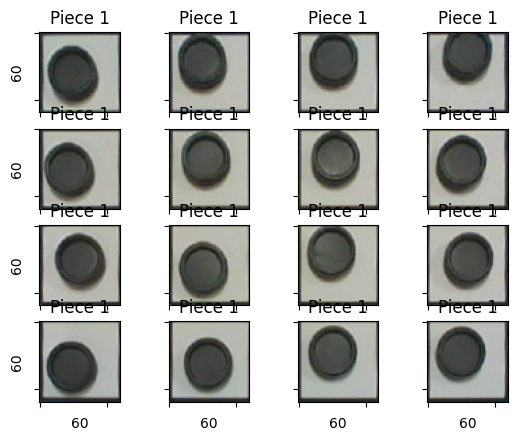

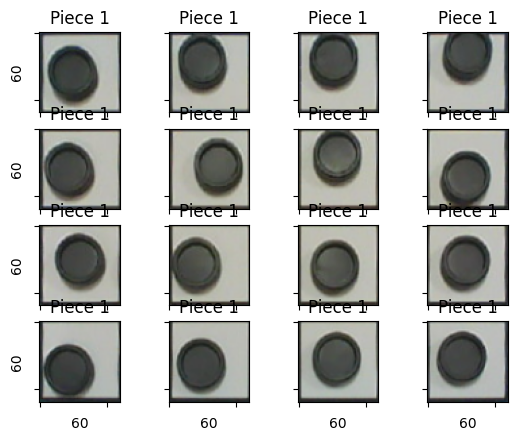

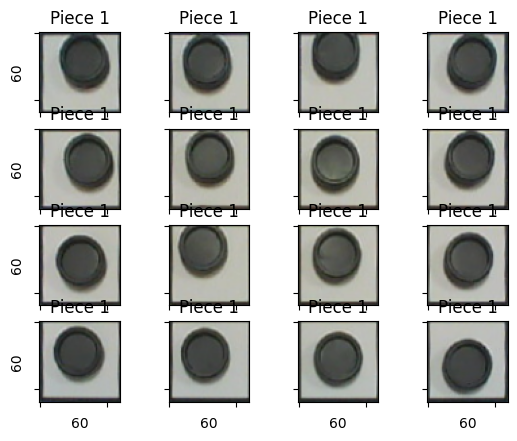

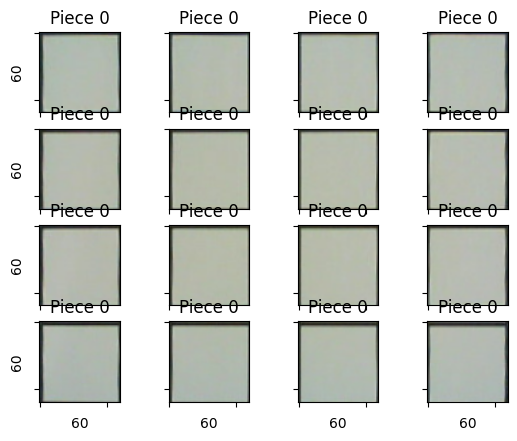

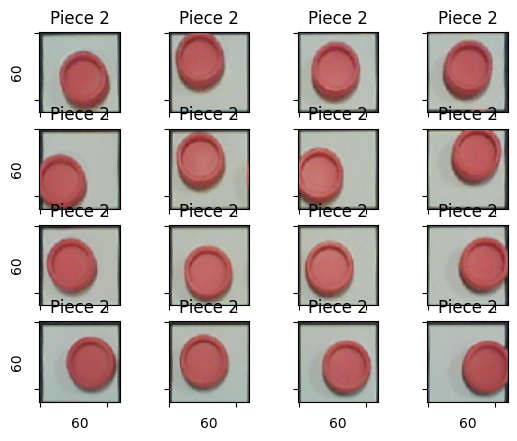

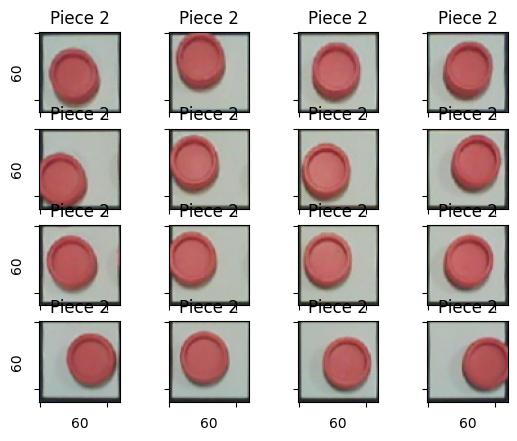

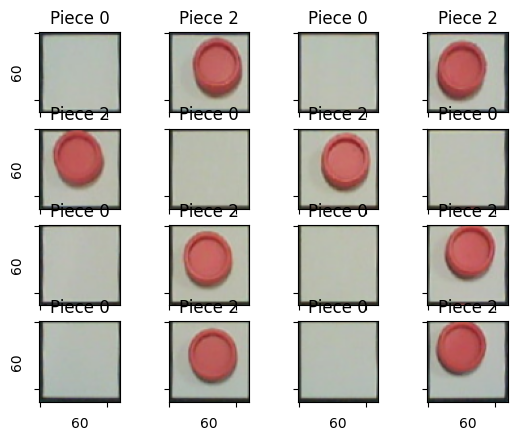

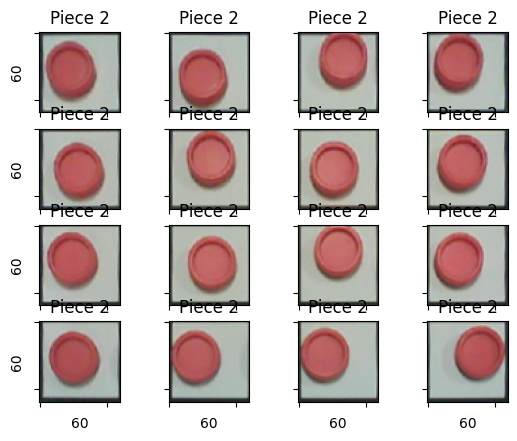

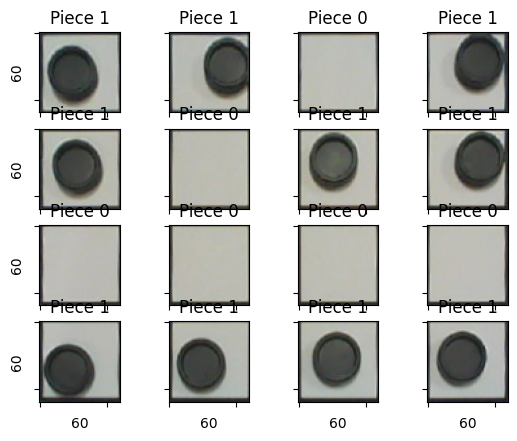

In [16]:
count=0
for name in board_states:
    filename=training_boards_folder+"/"+name
    board_string=board_states[name]
    
    state=Board(board_string)
    print(filename,board_string)
    image=imread(filename)

    # these 5 lines are specific to your image
    image=image[30:260,20:340,:]  # truncate if you need to
    gray,black_and_white=get_gray_and_threshold_image(image,threshold=90)
    corners=find_corners(black_and_white,plotit=False)
    im3=straighten_image(image,corners)
    squares=get_board_squares_from_image(im3,state.shape)


    training_squares_folder='images/2024-11-21 - training squares'
    
    if not os.path.exists(training_squares_folder):
        print(f"Making folder {training_squares_folder}")
        os.mkdir(training_squares_folder)
    
    
    nr,nc=state.shape
    saveit=True

    figure()
    plot_count=0
    for r in range(nr):
        for c in range(nc):
    
            subplot(nr,nc,plot_count+1)
            imshow(squares[plot_count])
    
            shape=squares[plot_count].shape
            piece=state.board[plot_count]
            
            title(f"Piece {piece}")
            if c==0:
                ylabel(shape[0])
    
            if r==nr-1:
                xlabel(shape[1])
            gca().set_xticklabels([])
            gca().set_yticklabels([])
    
    
            if saveit:
                piece_folder=f"{training_squares_folder}/piece_{piece}"
                if not os.path.exists(piece_folder):
                    print(f"Making folder {piece_folder}")
                    os.mkdir(piece_folder)
                
                fname=f"{piece_folder}/square{count}_{piece}.jpg"
                print(fname)
                imsave(fname,squares[plot_count])
            
            
            plot_count+=1  
            count+=1


